<a href="https://colab.research.google.com/github/meghana-1512/CODSOFT/blob/machine-learning/TASK3_CODSOFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bank customer churn prediction

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [24]:
df=pd.read_csv('/content/charn path.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [26]:
#Data is Clear
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
#Three unique countries
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [28]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


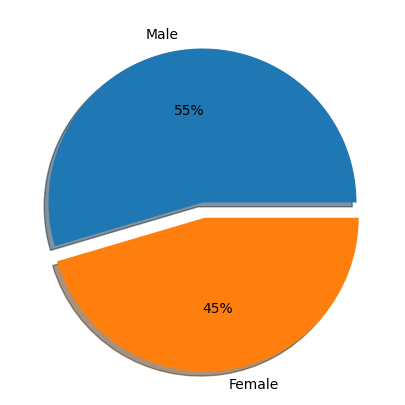

In [29]:
#Gender distribution
plt.figure(figsize = (10,5))
plt.pie(df['Gender'].value_counts().values,labels=['Male','Female'],autopct='%.f%%',explode = [0,0.1],shadow = True)
plt.show()

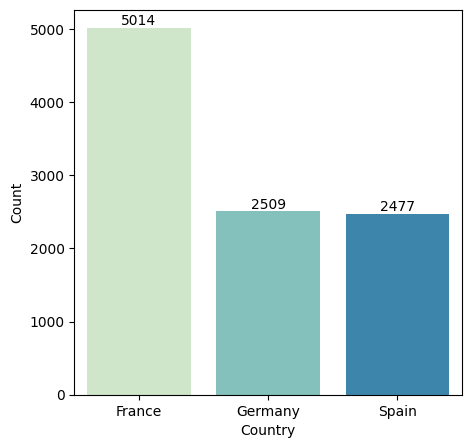

In [30]:
#Geography wise
region = df.Geography.value_counts().to_frame().reset_index()
region.columns = ['Country','Count']
plt.figure(figsize = (5,5))
ax=sns.barplot(x = region['Country'],y = region['Count'],palette='GnBu')
for i in ax.containers:
    ax.bar_label(i,)

In [31]:
#Delete unnecessary columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
#Encoding
labelencoder=LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])
df['Geography']=labelencoder.fit_transform(df['Geography'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [33]:
df.dtypes

,0
CreditScore,int64
Geography,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [34]:
#Droping coulmn from the features
x=df.drop(columns='Exited')
y=df['Exited']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=40)

In [36]:
#Create Random Forest Classifier model
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
#Model score
model.score(x_train,y_train)

1.0

In [38]:
#Model score
model.score(x_train,y_train)


1.0

In [39]:
#Prediction
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [40]:
#Length
len(y_pred)

3000

In [41]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.03%


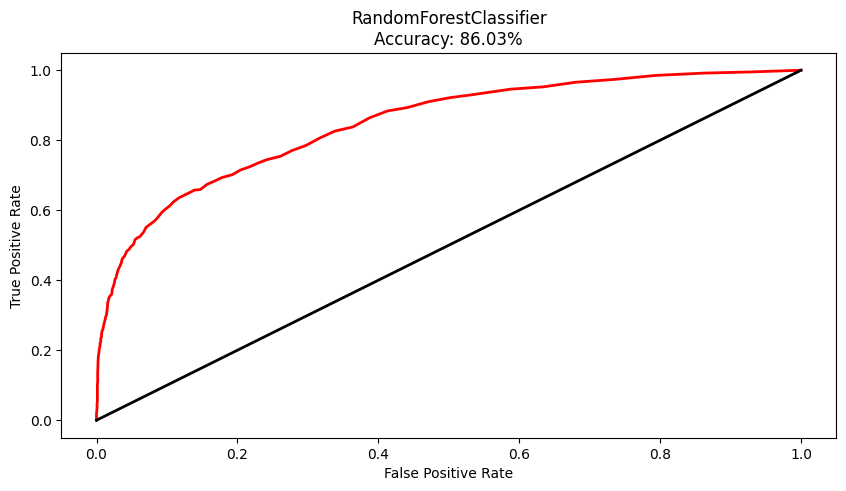

In [42]:
#Visualization
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [43]:
#Create Logistic Regression model
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
#Model Score
model_score=model.score(x_train,y_train)
print(model_score)

0.7902857142857143


In [45]:
#Prediction
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [46]:
#Accuracy
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.90%


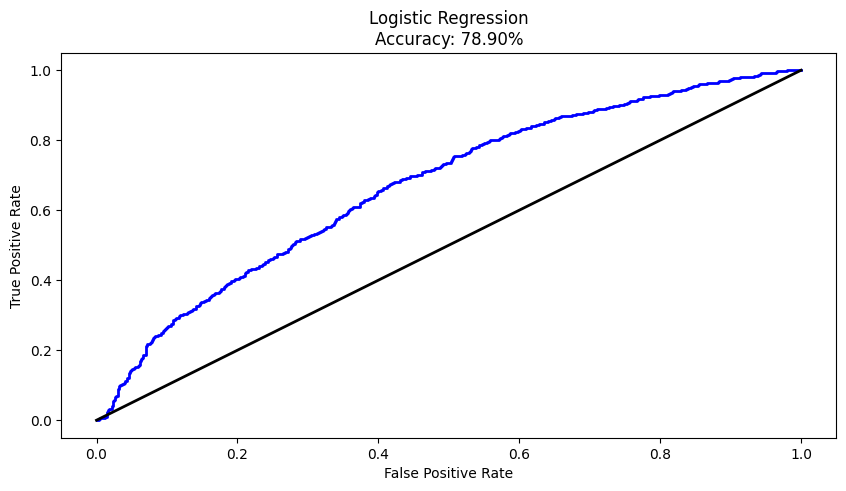

In [47]:
#Visualization
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [48]:
#Create Gradient Boosting model
model=GradientBoostingClassifier()
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [50]:
#Model Score
model_score=model.score(x_train, y_train)
print(model_score)


0.8734285714285714


In [51]:
#Prediction
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 ... 1 0 1]


In [52]:
#Accuracy
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.37%


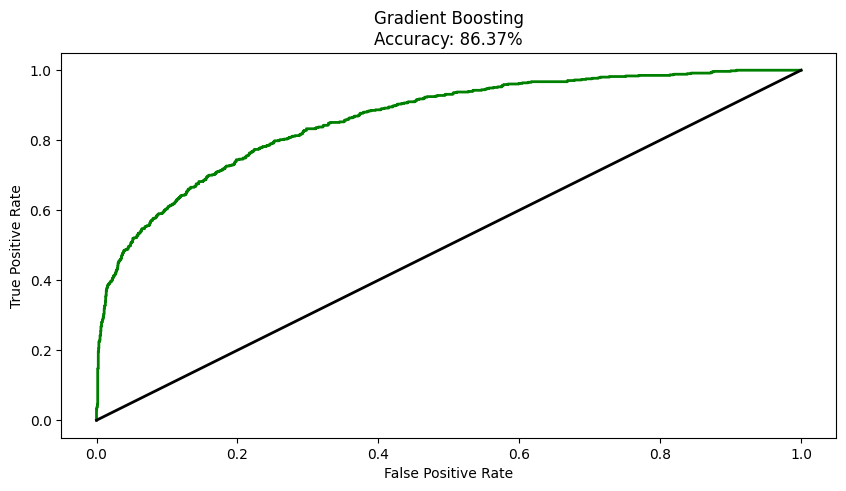

In [53]:
#Visualization
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='green', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [54]:
#Define model names
model_names = ["Random Forest", "Logistic Regression", "Gradient Boosting"]

In [55]:
#Define lists to store accuracies
acc_list = []

In [56]:
#Calculate and store accuracies for each model
for model in [RandomForestClassifier(), LogisticRegression(), GradientBoostingClassifier()]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)

In [57]:
#DataFrame to store results
model_results = pd.DataFrame({"Model": model_names,
                              "Accuracy_Score": acc_list})
model_results

,Model,Accuracy_Score
0,Random Forest,0.860000
1,Logistic Regression,0.789000
2,Gradient Boosting,0.863667


<Axes: xlabel='Model', ylabel='Accuracy_Score'>

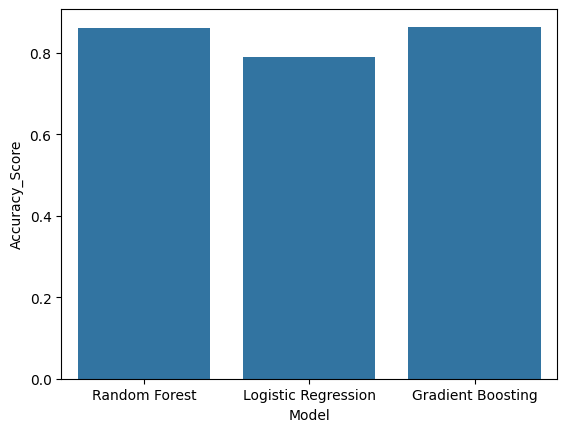

In [58]:
#Barplot of accuracies
sns.barplot(x="Model", y="Accuracy_Score", data=model_results)